In [2]:
import pickle
# To embed plots in the notebooks
%matplotlib inline


import numpy as np


from plotting import *

def get_results(results_file):
    file = open(f"results/{results_file}", "rb") 
    Results = pickle.load(file)
    return Results

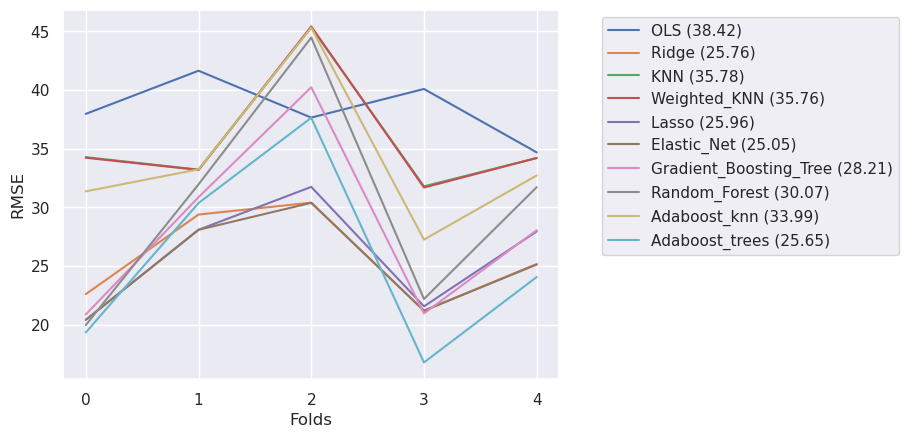

dict_keys(['OLS', 'Ridge', 'KNN', 'Weighted_KNN', 'Lasso', 'Elastic_Net', 'Gradient_Boosting_Tree', 'Random_Forest', 'Adaboost_knn', 'Adaboost_trees'])

In [11]:
Results = get_results("results_rmse_1678829754.median_impute.pickle")
plot_cross_val(Results, show=True, save=False)
Results.keys()

# Plot

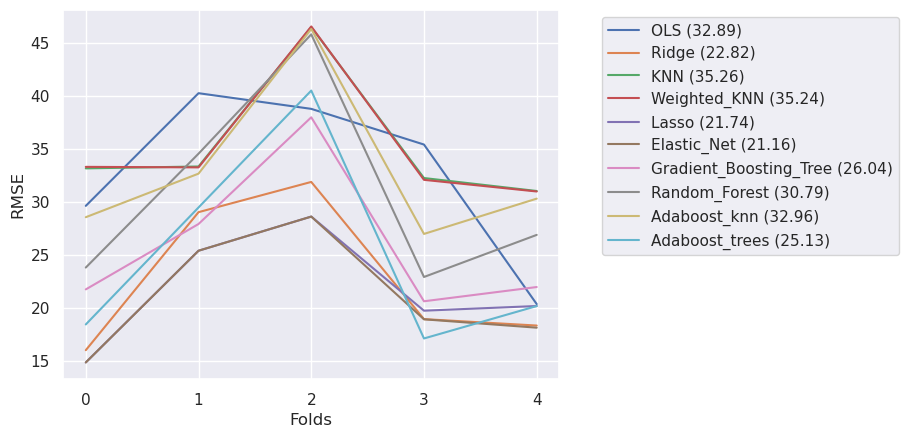

In [10]:
Results = get_results("results_rmse_1678952879.anna_impute.pickle")
plot_cross_val(Results, show=True, save=False)

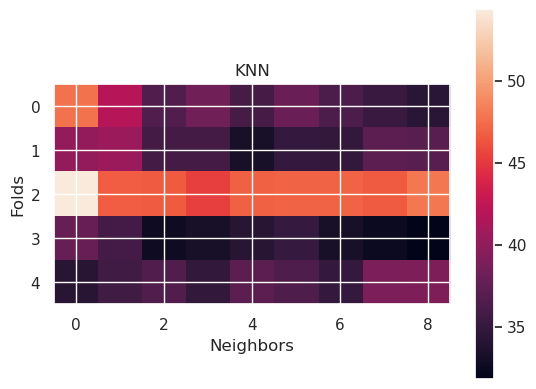

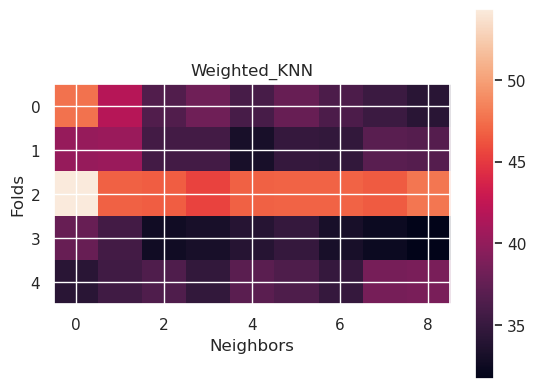

In [4]:
def knn_cv(weighted=True):
    knn = "Weighted_KNN" if weighted else "KNN"
    plt.imshow(Results[knn]['RMSE'])
    plt.ylabel("Folds")
    plt.xlabel("Neighbors")
    plt.title(knn)
    plt.colorbar()
    plt.show()

knn_cv(weighted = False)
knn_cv(weighted = True)

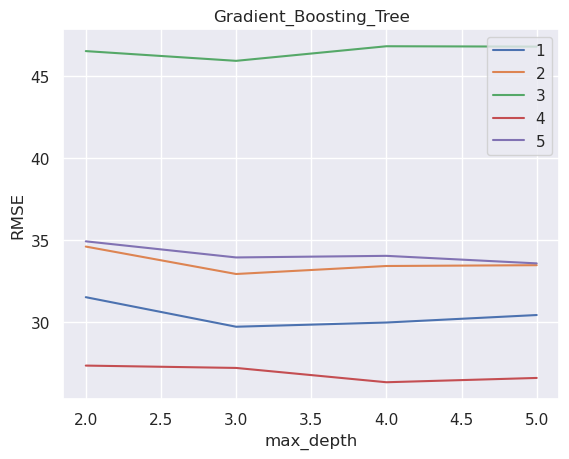

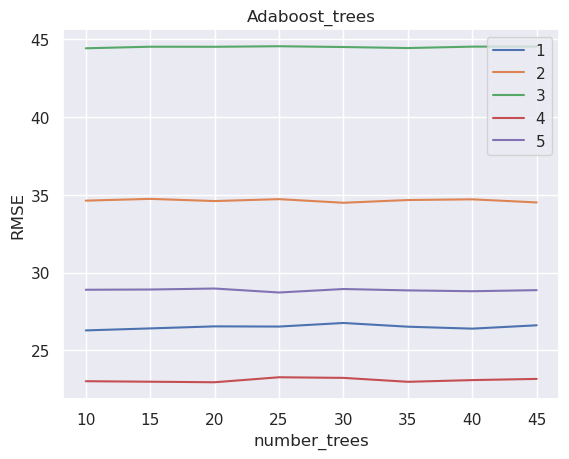

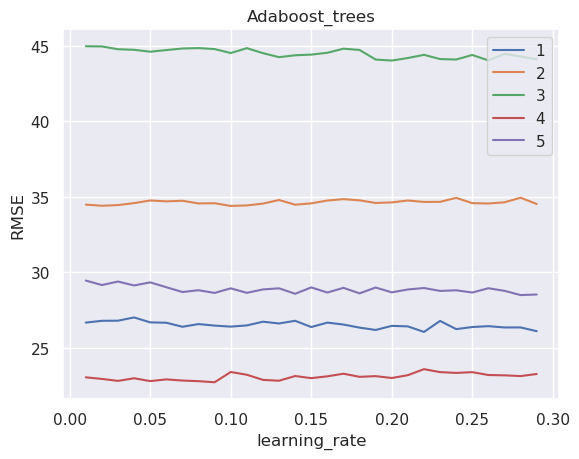

<Figure size 640x480 with 0 Axes>

In [5]:
plot_method_cv(Results, "Gradient_Boosting_Tree", "max_depth")
plot_method_cv(Results, "Adaboost_trees", "number_trees")
plot_method_cv(Results, "Adaboost_trees", "learning_rate")

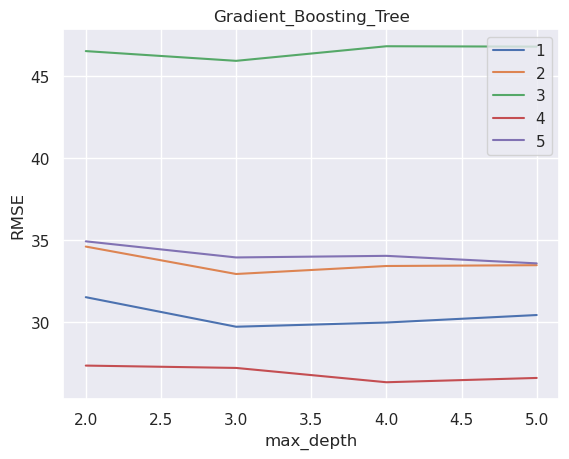

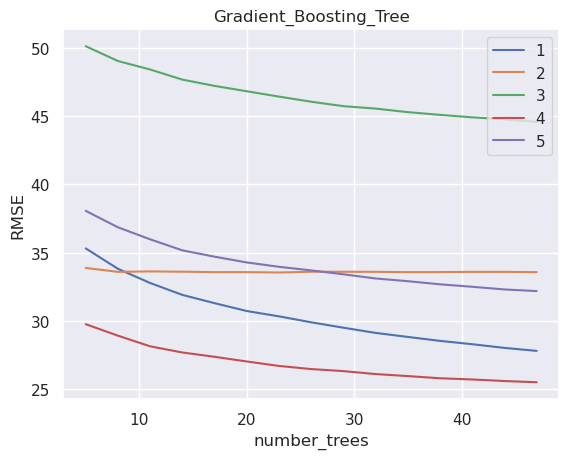

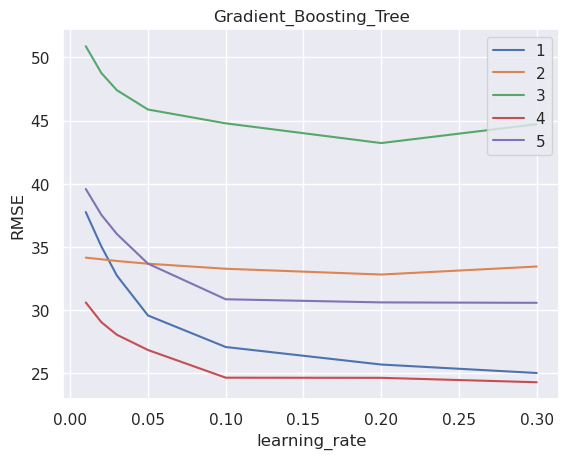

<Figure size 640x480 with 0 Axes>

In [6]:
plot_method_cv(Results, "Gradient_Boosting_Tree", "max_depth")
plot_method_cv(Results, "Gradient_Boosting_Tree", "number_trees")
plot_method_cv(Results, "Gradient_Boosting_Tree", "learning_rate")

In [ ]:
for k in Kfold(5):
    model = ElasticNetCV(param_grid)
    
    
#retrain 
final_model = Elasticnet(lambda_, alpha)
final_model.fit(X, y)

In [36]:
Results['Gradient_Boosting_Tree']['number_trees']

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47])

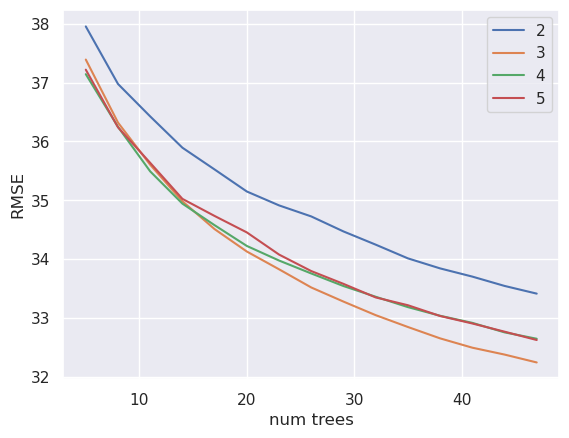

In [55]:
res = Results['Gradient_Boosting_Tree']['RMSE']
grid = []
for i in range(len(Results['Gradient_Boosting_Tree']['number_trees'])):
    temp = res[:, :, i, :].mean(axis=0)
    grid.append(temp.mean(axis=1))
        
grid = np.array(grid)
grid.shape
plt.plot(Results['Gradient_Boosting_Tree']['number_trees'], np.array(grid), label=Results['Gradient_Boosting_Tree']['max_depth'])
plt.xlabel("num trees")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
def plot_method_cv(Results, method, param, show=True, save=True, save_file=None):
    if not save_file:
        save_file = f"cross_validation_{method}_{param}.png"
        
    res = Results[method]
    K = res['RMSE'].shape[0]
    rmse = np.zeros((K, len(res[param])))
    num_params = len(res.keys())-1
    param_idx = list(res.keys()).index(param)
    for k in range(K): 
        for i, md in enumerate(res[param]):
            rmse_for_fold = res["RMSE"][k]
            if num_params == 1:
                rmse_for_param = rmse_for_fold[i]
            elif num_params == 2:
                if param_idx == 0:
                    rmse_for_param = rmse_for_fold[i, :]
                else:
                    rmse_for_param = rmse_for_fold[:, i]
            elif num_params == 3:
                if param_idx == 0:
                    rmse_for_param = rmse_for_fold[i, :, :]
                elif param_idx== 1:
                    rmse_for_param = rmse_for_fold[:, i, :]
                else:
                    rmse_for_param = rmse_for_fold[:, :, i]
            else:
                print("too many params")


            rmse[k, i] = rmse_for_param.mean()
    plt.plot(res[param], rmse.T, label=np.arange(K)+1)
    #plt.xticks(np.arange(len(res[param])), )
    plt.xlabel(param)
    plt.ylabel("RMSE")
    plt.title(method)
    plt.legend(loc='upper right')

    if show:
        plt.show()
    if save:
        plt.savefig(f"figures/{save_file}")